In [1]:
import torch
import numpy as np
import dimensionalityreductionmethods as drm

In [2]:
def generate_linear_data(n_samples=100, input_dim=3, output_dim=2, add_bias=True):
    x = np.random.rand(n_samples, input_dim)
    A = np.random.rand(output_dim, input_dim)
    b = np.random.rand(output_dim) if add_bias else np.zeros(output_dim)
    y = x @ A.T + b

    return x, y


def noise_model(x_normalized, factor=1):
    """
    Adds noise based on the overall variance of all elements in x_normalized.

    Parameters:
        x_normalized: A Tensor of normalized data where noise needs to be added.
        factor (float): the factor by which the noise is multiplied by, default is 1.

    Returns:
        A function to add noise to a given x.
    """
    overall_variance = torch.var(x_normalized, unbiased=False)
    overall_noise_std = torch.sqrt(overall_variance)

    def add_noise(x_obs):
        noise = torch.randn_like(x_obs) * overall_noise_std * factor
        noisy_x = x_obs + noise

        return noisy_x

    return add_noise

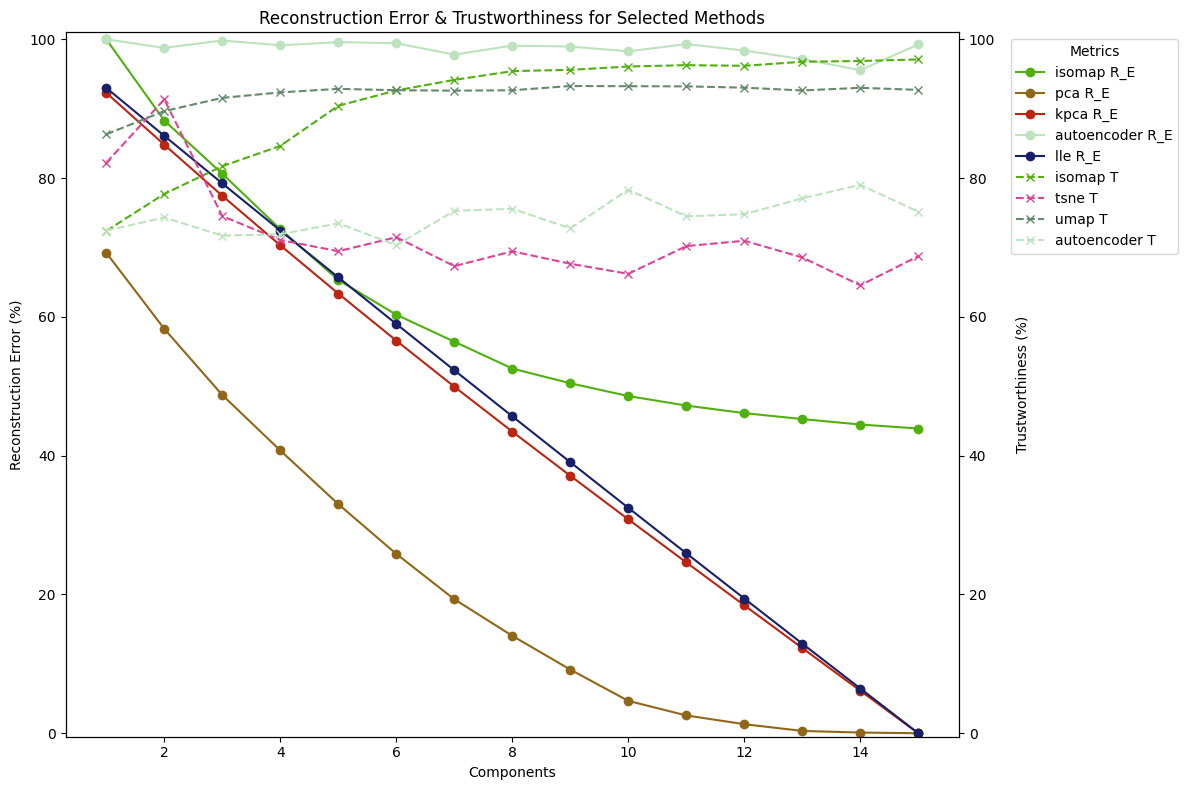

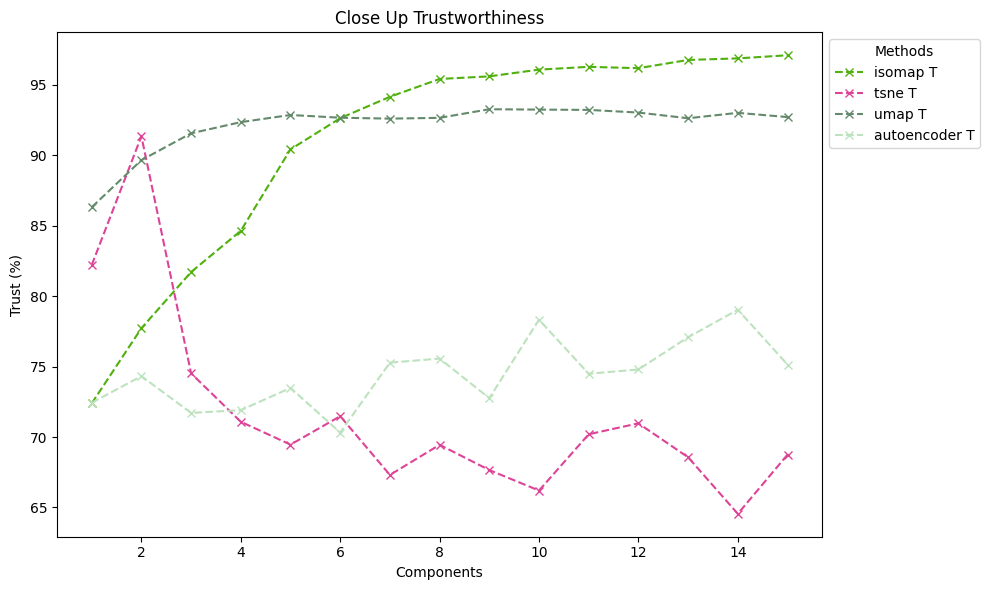

| Method      | Opt. Trustworthiness Components   | Max Trustworthiness   | Opt. Error Components   | Min R. Error           |       time |
|-------------|-----------------------------------|-----------------------|-------------------------|------------------------|------------|
| isomap      | 15                                | 97.09347826086957     | 15                      | 43.91151551086169      |  0.145974  |
| pca         | -                                 | -                     | 15                      | -2.220446049250313e-14 |  0.0101299 |
| tsne        | 2                                 | 91.34347826086957     | -                       | -                      | 10.5214    |
| umap        | 9                                 | 93.26304347826087     | -                       | -                      | 10.0337    |
| kpca        | -                                 | -                     | 15                      | 0.0                    |  0.108367  |
| autoencoder | 14  

c:\Users\darianz\Documents\DimensionalityReductionMethods\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\darianz\Documents\DimensionalityReductionMethods\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\darianz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preex

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


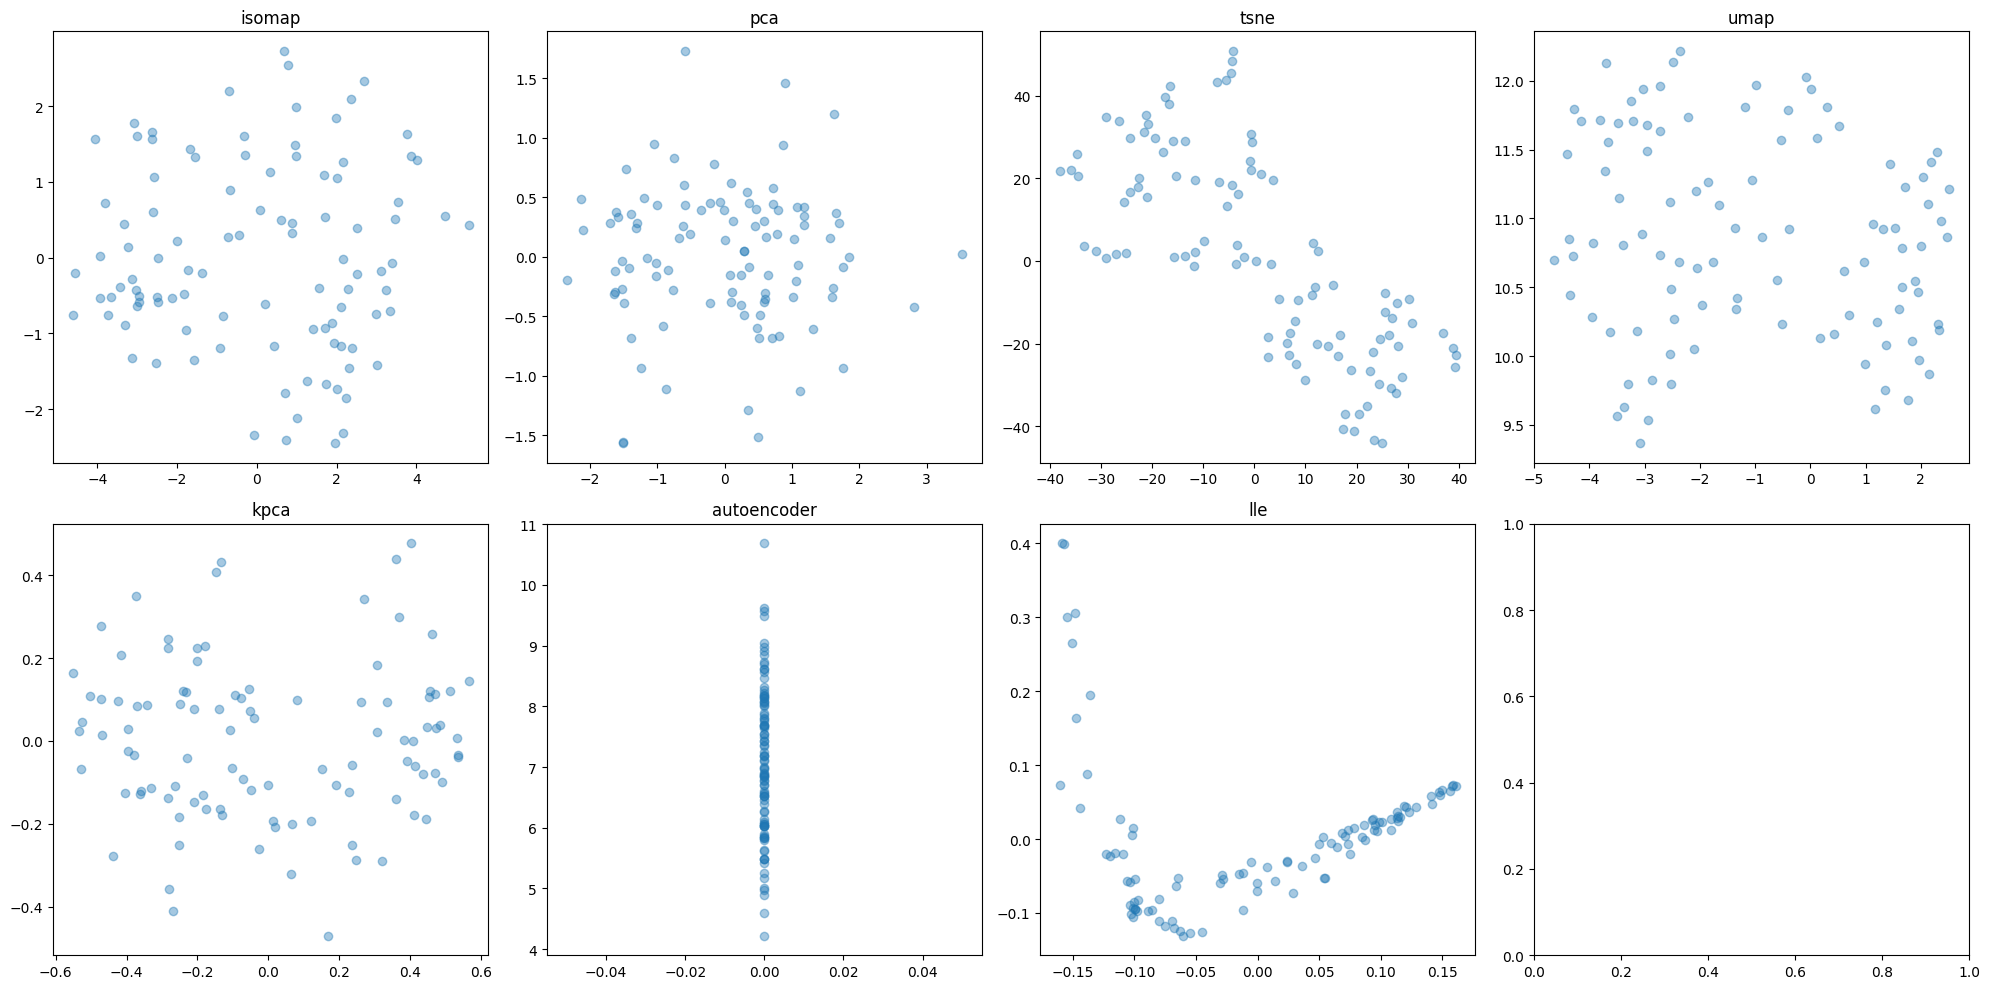

In [3]:
x, y = generate_linear_data(n_samples=100, input_dim=10, output_dim=5)

add_noise = noise_model(torch.from_numpy(x))
noisy_x = add_noise(torch.from_numpy(x))

combined_data = np.hstack((noisy_x, y))

drh = drm.DimensionalityReductionHandler(combined_data)
drh.analyze_dimensionality_reduction(
    [
        "isomap",
        "PCA",
        "Tsne",
        "Umap",
        "kpca",
        "autoencoder",
        "lle",
    ]
)
drh.plot_results()
drh.table()
drh.visualization()